# AIP 3 Group Project: Miriam Fernandez Romero, Alexandra Vas Ferreira, Egor Bogachev

In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In below two cells we read dataset downloaded from kagge.com and create the dataframe to work with. Dataset located in https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression
In below cels we read in the dataset into the pandas dataframe

In [2]:
database3_url = "framingham.csv"

In [3]:
database3_df=pd.read_csv(database3_url)

Below cell shows shows first 4 rows out above dataset

In [4]:
database3_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In below two cells we list basic information on all columns in dataset.

In [5]:
database3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# list the features of the dataset
database3_df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Below two cells list magnitude of missing data for each feature in the dataset

In [7]:
missing_data = database3_df.isnull().sum()

In [8]:
missing_data

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Below two cels show the age range (min and max) of patients in the dataset

In [9]:
database3_df['age'].min()

32

In [10]:
database3_df['age'].max()

70

In below two cells we evaluate total percantage of missing data

In [11]:
total_missing = missing_data.sum()
total_cells = np.product(database3_df.shape)
percent_missing = (total_missing / total_cells) * 100

In [12]:
print(percent_missing,'%')

0.9512151958470976 %


In below two cells we look at mean valueof data for each featuree in the dataset and repalce the missing value in dataset with mean value of data in column.

In [13]:
database3_df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [14]:
database3_df = database3_df.fillna(database3_df.mean())
# database3_df = np.round

Now we chack again for missing data in dataset, there are no mising data anymore.

In [15]:
database3_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In below x7 cells we check for data inconcistencies after inserting mean columns values into the cells with missing data. 
We do it by chcking unique data values in each of x7 columns we modified. The data below shows some data inconsistencies in x6 ot of x7 colums that we modified.

In [16]:
database3_df.education.unique()

array([4.        , 2.        , 1.        , 3.        , 1.97894992])

In [17]:
database3_df.cigsPerDay.unique()

array([ 0.        , 20.        , 30.        , 23.        , 15.        ,
        9.        , 10.        ,  5.        , 35.        , 43.        ,
        1.        , 40.        ,  3.        ,  2.        ,  9.00308862,
       12.        ,  4.        , 18.        , 25.        , 60.        ,
       14.        , 45.        ,  8.        , 50.        , 13.        ,
       11.        ,  7.        ,  6.        , 38.        , 29.        ,
       17.        , 16.        , 19.        , 70.        ])

In [18]:
database3_df.BPMeds.unique()

array([0.        , 1.        , 0.02962963])

In [19]:
database3_df.totChol.unique()

array([195.        , 250.        , 245.        , 225.        ,
       285.        , 228.        , 205.        , 313.        ,
       260.        , 254.        , 247.        , 294.        ,
       332.        , 226.        , 221.        , 232.        ,
       291.        , 190.        , 185.        , 234.        ,
       215.        , 270.        , 272.        , 295.        ,
       209.        , 175.        , 214.        , 257.        ,
       178.        , 233.        , 180.        , 243.        ,
       237.        , 236.72158548, 311.        , 208.        ,
       252.        , 261.        , 179.        , 194.        ,
       267.        , 216.        , 240.        , 266.        ,
       255.        , 220.        , 235.        , 212.        ,
       223.        , 300.        , 302.        , 248.        ,
       200.        , 189.        , 258.        , 202.        ,
       213.        , 183.        , 274.        , 170.        ,
       210.        , 197.        , 326.        , 188.  

In [20]:
database3_df.BMI.unique()

array([26.97, 28.73, 25.34, ..., 39.17, 26.7 , 43.67])

In [21]:
database3_df.heartRate.unique()

array([ 80.        ,  95.        ,  75.        ,  65.        ,
        85.        ,  77.        ,  60.        ,  79.        ,
        76.        ,  93.        ,  72.        ,  98.        ,
        64.        ,  70.        ,  71.        ,  62.        ,
        73.        ,  90.        ,  96.        ,  68.        ,
        63.        ,  88.        ,  78.        ,  83.        ,
       100.        ,  67.        ,  84.        ,  57.        ,
        50.        ,  74.        ,  86.        ,  55.        ,
        92.        ,  66.        ,  87.        , 110.        ,
        81.        ,  56.        ,  89.        ,  82.        ,
        48.        , 105.        ,  61.        ,  54.        ,
        69.        ,  52.        ,  94.        , 140.        ,
       130.        ,  58.        , 108.        , 104.        ,
        91.        ,  53.        ,  75.87892377, 106.        ,
        59.        ,  51.        , 102.        , 107.        ,
       112.        , 125.        , 103.        ,  44.  

In [22]:
database3_df.glucose.unique()

array([ 77.        ,  76.        ,  70.        , 103.        ,
        85.        ,  99.        ,  78.        ,  79.        ,
        88.        ,  61.        ,  64.        ,  84.        ,
        81.96675325,  72.        ,  89.        ,  65.        ,
       113.        ,  75.        ,  83.        ,  66.        ,
        74.        ,  63.        ,  87.        , 225.        ,
        90.        ,  80.        , 100.        , 215.        ,
        98.        ,  62.        ,  95.        ,  94.        ,
        55.        ,  82.        ,  93.        ,  73.        ,
        45.        , 202.        ,  68.        ,  97.        ,
       104.        ,  96.        , 126.        , 120.        ,
       105.        ,  71.        ,  56.        ,  60.        ,
       117.        , 102.        ,  58.        ,  92.        ,
       109.        ,  86.        , 107.        ,  54.        ,
        67.        ,  69.        ,  57.        ,  91.        ,
       132.        , 150.        ,  59.        ,  81.  

Because we found some data inconcistencies in the above columns, we now will round the values in all the x7 above columns in the below cell.

In [23]:
# round the values in next columns
roundCols = ['education','cigsPerDay','BPMeds','totChol','heartRate','glucose','BMI']

In [24]:
database3_df[roundCols] = database3_df[roundCols].round(0)

Now we check again the unique values in our modified columns (those x7 columns in which we replaced the missing values with column mean values).

In [25]:
database3_df.education.unique()

array([4., 2., 1., 3.])

In [26]:
database3_df.cigsPerDay.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

In [27]:
database3_df.BPMeds.unique()

array([0., 1.])

In [28]:
database3_df.totChol.unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
       311., 208., 252., 261., 179., 194., 267., 216., 240., 266., 255.,
       220., 235., 212., 223., 300., 302., 248., 200., 189., 258., 202.,
       213., 183., 274., 170., 210., 197., 326., 188., 256., 244., 193.,
       239., 296., 269., 275., 268., 265., 173., 273., 290., 278., 264.,
       282., 241., 288., 222., 303., 246., 150., 187., 286., 154., 279.,
       293., 259., 219., 230., 320., 312., 165., 159., 174., 242., 301.,
       167., 308., 325., 229., 236., 224., 253., 464., 171., 186., 227.,
       249., 176., 163., 191., 263., 196., 310., 164., 135., 238., 207.,
       342., 287., 182., 352., 284., 217., 203., 262., 129., 155., 323.,
       206., 283., 319., 304., 340., 328., 280., 368., 218., 276., 339.,
       231., 198., 177., 201., 277., 184., 199., 16

In [29]:
database3_df.BMI.unique()

array([27., 29., 25., 23., 30., 33., 22., 26., 24., 28., 31., 21., 34.,
       19., 39., 40., 20., 18., 35., 46., 38., 41., 42., 32., 37., 17.,
       44., 36., 16., 43., 45., 57., 51.])

In [30]:
database3_df.heartRate.unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53., 106.,
        59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,  97.,
       122., 120.,  99., 115., 143., 101.,  46.])

In [31]:
database3_df.glucose.unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  82.,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120., 105.,
        71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,  54.,
        67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140., 112.,
       118., 143., 114., 160., 110., 123., 108., 145., 122., 137., 106.,
       127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116., 121.,
       172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,  50.,
       274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,  48.,
       386., 155., 147., 170.,  52., 320., 254., 394., 270., 244., 183.,
       142., 119., 135., 167., 207., 129., 177., 250., 294., 166., 125.,
       332., 368., 348., 248., 370., 193., 191., 256., 235., 210., 260.])

The data now looks concistent and ready for further analysis / model build.

In [32]:
database3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [33]:
from sklearn import preprocessing

# create function to code the categorical data with numerical values
def encode_features(dataframe):
    result = dataframe.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [34]:
# implement the above function on our data frame
encoded_df, encoders = encode_features(database3_df) 
encoded_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.0,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0


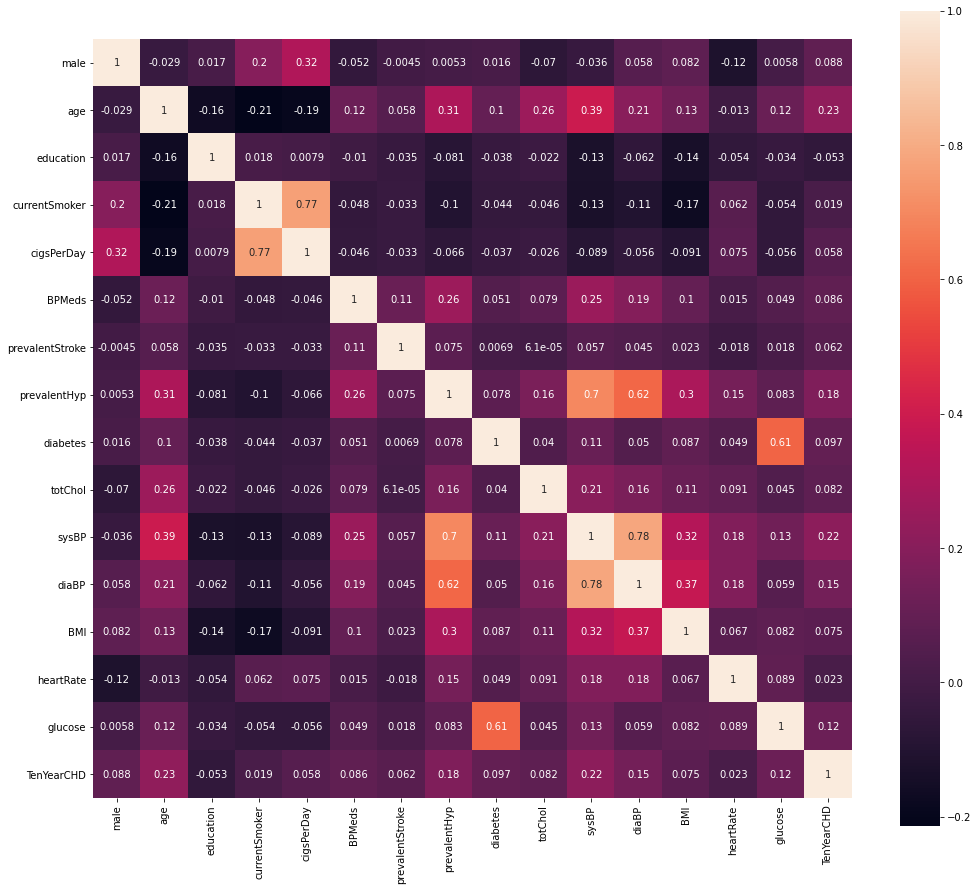

In [35]:
import matplotlib.pyplot as plt

# build correlation matrix for the data features
plt.subplots(figsize=(17, 15))
sns.heatmap(encoded_df.corr(), square = True, annot=True)
plt.show()

From above correlation matrix the higest positive correlation with target feature 'TenYerCHD' show the features 'age', 'prevalentHyp', 'sysBP'.

In [36]:
# separate target variable from other features
y = np.array(encoded_df['TenYearCHD'])
del encoded_df['TenYearCHD']
X = encoded_df.values
X.shape, y.shape

((4238, 15), (4238,))

In [37]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets with 90 / 10 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Build KNeighborsClassifier model on our data with test / train split 10% / 90%

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
neighbors = np.arange(1,9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))   # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix

In [40]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array
    
    print("\nFor",k,"neighbors:")
    print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


For 1 neighbors:
Training set score: 1.00
Test set score: 0.77

For 2 neighbors:
Training set score: 0.88
Test set score: 0.84

For 3 neighbors:
Training set score: 0.88
Test set score: 0.83

For 4 neighbors:
Training set score: 0.86
Test set score: 0.85

For 5 neighbors:
Training set score: 0.86
Test set score: 0.83

For 6 neighbors:
Training set score: 0.86
Test set score: 0.84

For 7 neighbors:
Training set score: 0.86
Test set score: 0.84

For 8 neighbors:
Training set score: 0.86
Test set score: 0.85


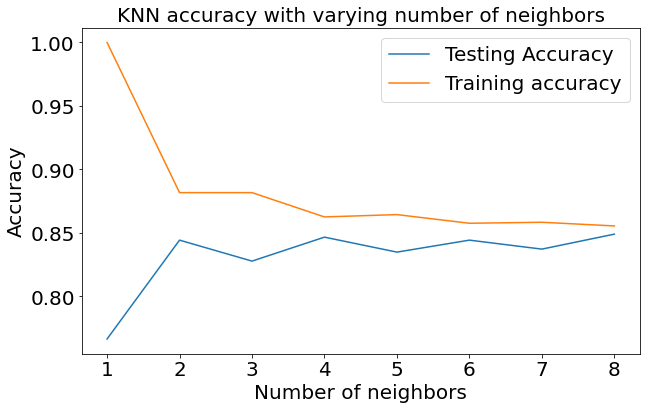

In [41]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Repeating above steps for KNeighborsClassifier model on our data with test / train split 20% / 80%

In [42]:
# split the data into training and testing sets with 80 / 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array
    
    print("\nFor",k,"neighbors:")
    print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


For 1 neighbors:
Training set score: 1.00
Test set score: 0.77

For 2 neighbors:
Training set score: 0.88
Test set score: 0.83

For 3 neighbors:
Training set score: 0.88
Test set score: 0.82

For 4 neighbors:
Training set score: 0.86
Test set score: 0.83

For 5 neighbors:
Training set score: 0.86
Test set score: 0.83

For 6 neighbors:
Training set score: 0.86
Test set score: 0.84

For 7 neighbors:
Training set score: 0.86
Test set score: 0.83

For 8 neighbors:
Training set score: 0.86
Test set score: 0.84


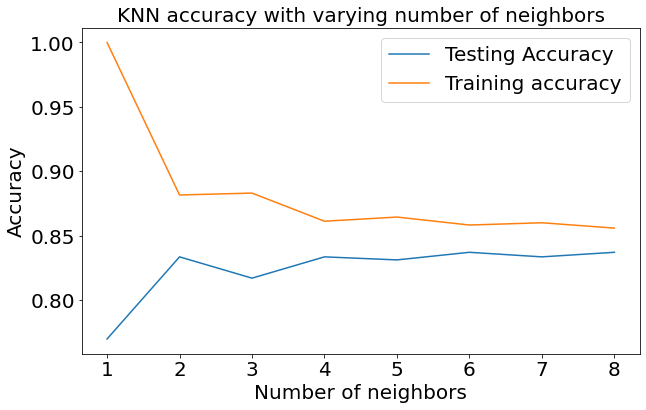

In [44]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Repeating above steps for KNeighborsClassifier model on our data with test / train split 30% / 70%

In [45]:
# split the data into training and testing sets with 70 / 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array
    
    print("\nFor",k,"neighbors:")
    print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


For 1 neighbors:
Training set score: 1.00
Test set score: 0.78

For 2 neighbors:
Training set score: 0.88
Test set score: 0.84

For 3 neighbors:
Training set score: 0.88
Test set score: 0.82

For 4 neighbors:
Training set score: 0.86
Test set score: 0.84

For 5 neighbors:
Training set score: 0.86
Test set score: 0.83

For 6 neighbors:
Training set score: 0.86
Test set score: 0.84

For 7 neighbors:
Training set score: 0.86
Test set score: 0.83

For 8 neighbors:
Training set score: 0.86
Test set score: 0.84


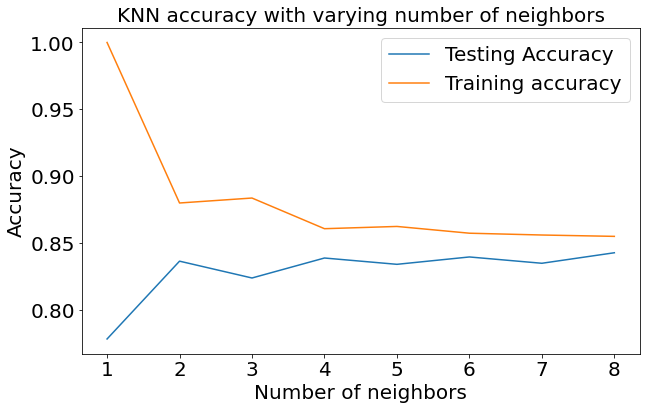

In [47]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

We can see from above model training and accuracies validations than test accuracy inscreased when neighbors increase from 1 to 8 and this trend is concistent through all x3 tried test / train split ratios (10%/90%, 20%/80%, 30%/70%)

Build SVC model on our data with train / test split ratio of 70% / 30%

In [51]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

print("Training set score: {:.2f}".format(svc_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_model.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.84


Now we normalise / scale our data and run CSV model again

In [52]:
# normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

In [53]:
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(svc_model.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(svc_model.score(X_test_scaled, y_test)))

Training set score: 0.85
Test set score: 0.84


In below cells we run artificial neural network model on out dataframe

In [54]:
#import required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [55]:
#build model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(15,15),activation='sigmoid')    
])
model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
             )
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 4ms/step - loss: 2.0404 - accuracy: 0.3260
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 1.5130 - accuracy: 0.6407
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 1.1687 - accuracy: 0.8103
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.9370 - accuracy: 0.8434
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.8370
Epoch 6/100
93/93 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.8371
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.8410
Epoch 8/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.8354
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8505
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8484
Epoch 11/

In [56]:
#evaluate model
model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 1s 2ms/step - loss: 0.3917 - accuracy: 0.8451


[0.3917216360569, 0.8451257944107056]

In [57]:
#build model again with one hidden layer added
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(15,15),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
             )
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 2ms/step - loss: 1.5849 - accuracy: 0.6919
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8544
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8499
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8478
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8603
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8606
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8455
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8509
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8513
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8572
Epoch 11/

In [58]:
#evaluate above built model
model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8514


[0.38930508494377136, 0.8514150977134705]

In [59]:
#build model again with two hidden layers added
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(15,15),activation='relu'),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
             )
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 4ms/step - loss: 1.4496 - accuracy: 0.5826
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.8555
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8403
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.8589
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3963 - accuracy: 0.8535
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.8361
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8543
Epoch 8/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8506
Epoch 9/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8511
Epoch 10/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8424
Epoch 11/

93/93 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8581
Epoch 77/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8605
Epoch 78/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8582
Epoch 79/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8569
Epoch 80/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8513
Epoch 81/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8585
Epoch 82/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8598
Epoch 83/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8623
Epoch 84/100
93/93 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8564
Epoch 85/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8550
Epoch 86/100


In [60]:
#evaluate above built model
model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8514


[0.3940700590610504, 0.8514150977134705]

In above project we used data from ongoing heart disease study from Framingham, US.

The dataset downloaded from kaggle.com https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

We used this datased and classification algorithms to build the classification models and evaluated their performance.
The algorithms used:
KNeighborsClassifier,
Support Vector Classification,
Artificial Neural Network